In [1]:
import pathlib
from glob import glob
from keras.preprocessing import image

In [2]:
!ls -l ./img

total 24
drwxr-xr-x 2 lab11 multi 12288 Apr 19 12:23 0
drwxr-xr-x 2 lab11 multi 12288 Apr 19 12:23 1


In [3]:
from tensorflow.keras.applications import ResNet50

conv_base =  ResNet50(weights='imagenet', include_top=False, input_shape =(640,640,3))

set_trainable = False

for layer in conv_base.layers:
    if layer.name =='conv5_block3_2_conv' :      
        set_trainable = True

    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 640, 640, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 646, 646, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 320, 320, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 320, 320, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [4]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid')) 

model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.000005), metrics=['accuracy'])    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 20, 20, 2048)      23587712  
_________________________________________________________________
flatten (Flatten)            (None, 819200)            0         
_________________________________________________________________
dense (Dense)                (None, 20)                16384020  
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 39,971,753
Trainable params: 19,799,593
Non-trainable params: 20,172,160
_________________________________________________________________


In [6]:
from keras.preprocessing.image import ImageDataGenerator

# image directory
image_dir = './img'

random_seed = 414

datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

train_generator = datagen.flow_from_directory(image_dir,target_size = (640, 640), seed=random_seed,
                                                    batch_size = 10, class_mode = 'binary', subset='training')
valid_generator = datagen.flow_from_directory(image_dir, target_size=(640, 640), seed=random_seed,
                                              batch_size=10, class_mode='binary', subset='validation')


Found 382 images belonging to 2 classes.
Found 162 images belonging to 2 classes.


In [7]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.33
session = InteractiveSession(config = config)

In [8]:
%%time

Hist = model.fit(train_generator, steps_per_epoch=382//10,
                epochs=50, validation_data=valid_generator, validation_steps=162//10) 

Epoch 1/50
38/38 [==============================] - 30s 651ms/step - loss: 0.7426 - accuracy: 0.4761 - val_loss: 0.6948 - val_accuracy: 0.4938
Epoch 2/50
38/38 [==============================] - 23s 600ms/step - loss: 0.6889 - accuracy: 0.5175 - val_loss: 0.6932 - val_accuracy: 0.4875
Epoch 3/50
38/38 [==============================] - 23s 601ms/step - loss: 0.6859 - accuracy: 0.5477 - val_loss: 0.6926 - val_accuracy: 0.4938
Epoch 4/50
38/38 [==============================] - 23s 601ms/step - loss: 0.6849 - accuracy: 0.6184 - val_loss: 0.6926 - val_accuracy: 0.4938
Epoch 5/50
38/38 [==============================] - 23s 601ms/step - loss: 0.6797 - accuracy: 0.5247 - val_loss: 0.6837 - val_accuracy: 0.5063
Epoch 6/50
38/38 [==============================] - 23s 610ms/step - loss: 0.6725 - accuracy: 0.6329 - val_loss: 0.6743 - val_accuracy: 0.7000
Epoch 7/50
38/38 [==============================] - 23s 601ms/step - loss: 0.6616 - accuracy: 0.5337 - val_loss: 0.6648 - val_accuracy: 0.6062

In [9]:
loss, accuracy = model.evaluate(valid_generator, steps=162//10)
loss, accuracy

16/16 [==============================] - 7s 403ms/step - loss: 0.4871 - accuracy: 0.7625


(0.48714226484298706, 0.762499988079071)

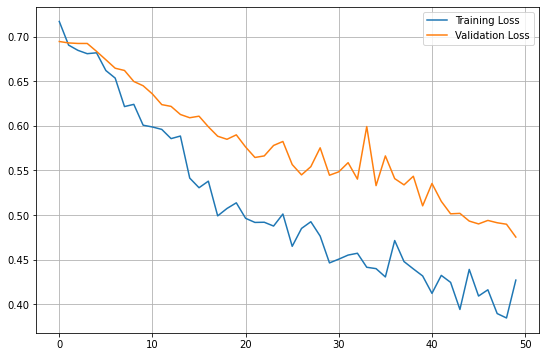

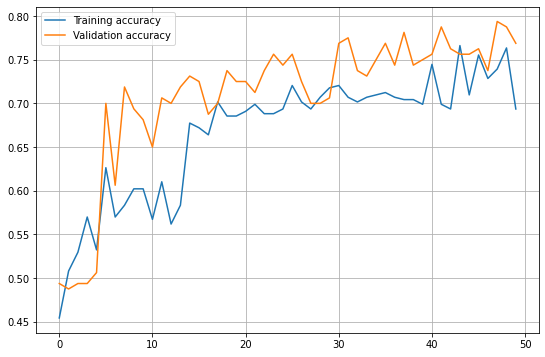

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize = (9, 6))
plt.plot( Hist.history['loss'])
plt.plot(Hist.history['val_loss'])

plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()


plt.figure(figsize = (9, 6))
plt.plot(Hist.history['accuracy'])
plt.plot( Hist.history['val_accuracy'])

plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()